# Data Science Internship at Widhya

## Mission: Bitcoin Price Prediction

#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading Dataset

In [ ]:
df=pd.read_csv("/content/BitCoin.csv")

#### Preview of Dataste

In [ ]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


#### Microtask-2: What's the 1024th value in the column 'btc_market_price'?

In [ ]:
df['btc_market_price'][1023]

13.6888

#### Microtask - 3: Which feature shows the perfect correlation with 'btc_market_price'?

In [ ]:
import seaborn as sns

In [ ]:
x=list(df.columns)

In [ ]:
x.remove('btc_market_price')
x

['Date',
 'btc_total_bitcoins',
 'btc_market_cap',
 'btc_trade_volume',
 'btc_blocks_size',
 'btc_avg_block_size',
 'btc_n_orphaned_blocks',
 'btc_n_transactions_per_block',
 'btc_median_confirmation_time',
 'btc_hash_rate',
 'btc_difficulty',
 'btc_miners_revenue',
 'btc_transaction_fees',
 'btc_cost_per_transaction_percent',
 'btc_cost_per_transaction',
 'btc_n_unique_addresses',
 'btc_n_transactions',
 'btc_n_transactions_total',
 'btc_n_transactions_excluding_popular',
 'btc_n_transactions_excluding_chains_longer_than_100',
 'btc_output_volume',
 'btc_estimated_transaction_volume',
 'btc_estimated_transaction_volume_usd']

In [ ]:
df.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999783,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,0.916937,0.986732,0.806595,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384568,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,0.497603,0.383108,0.472122,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999783,0.384568,1.000000,0.869316,0.672863,0.541310,-0.080742,0.541702,0.271929,0.922073,0.918065,0.985417,0.807109,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
btc_trade_volume,0.868813,0.285815,0.869316,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,0.754650,0.875005,0.733812,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672863,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,0.841630,0.622620,0.745205,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541310,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,0.704751,0.505197,0.654309,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080742,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,-0.092185,-0.052337,-0.095724,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541702,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,0.692416,0.505025,0.672839,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271929,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,0.368166,0.248290,0.416289,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922073,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,0.990243,0.879517,0.808587,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1440x1440 with 0 Axes>

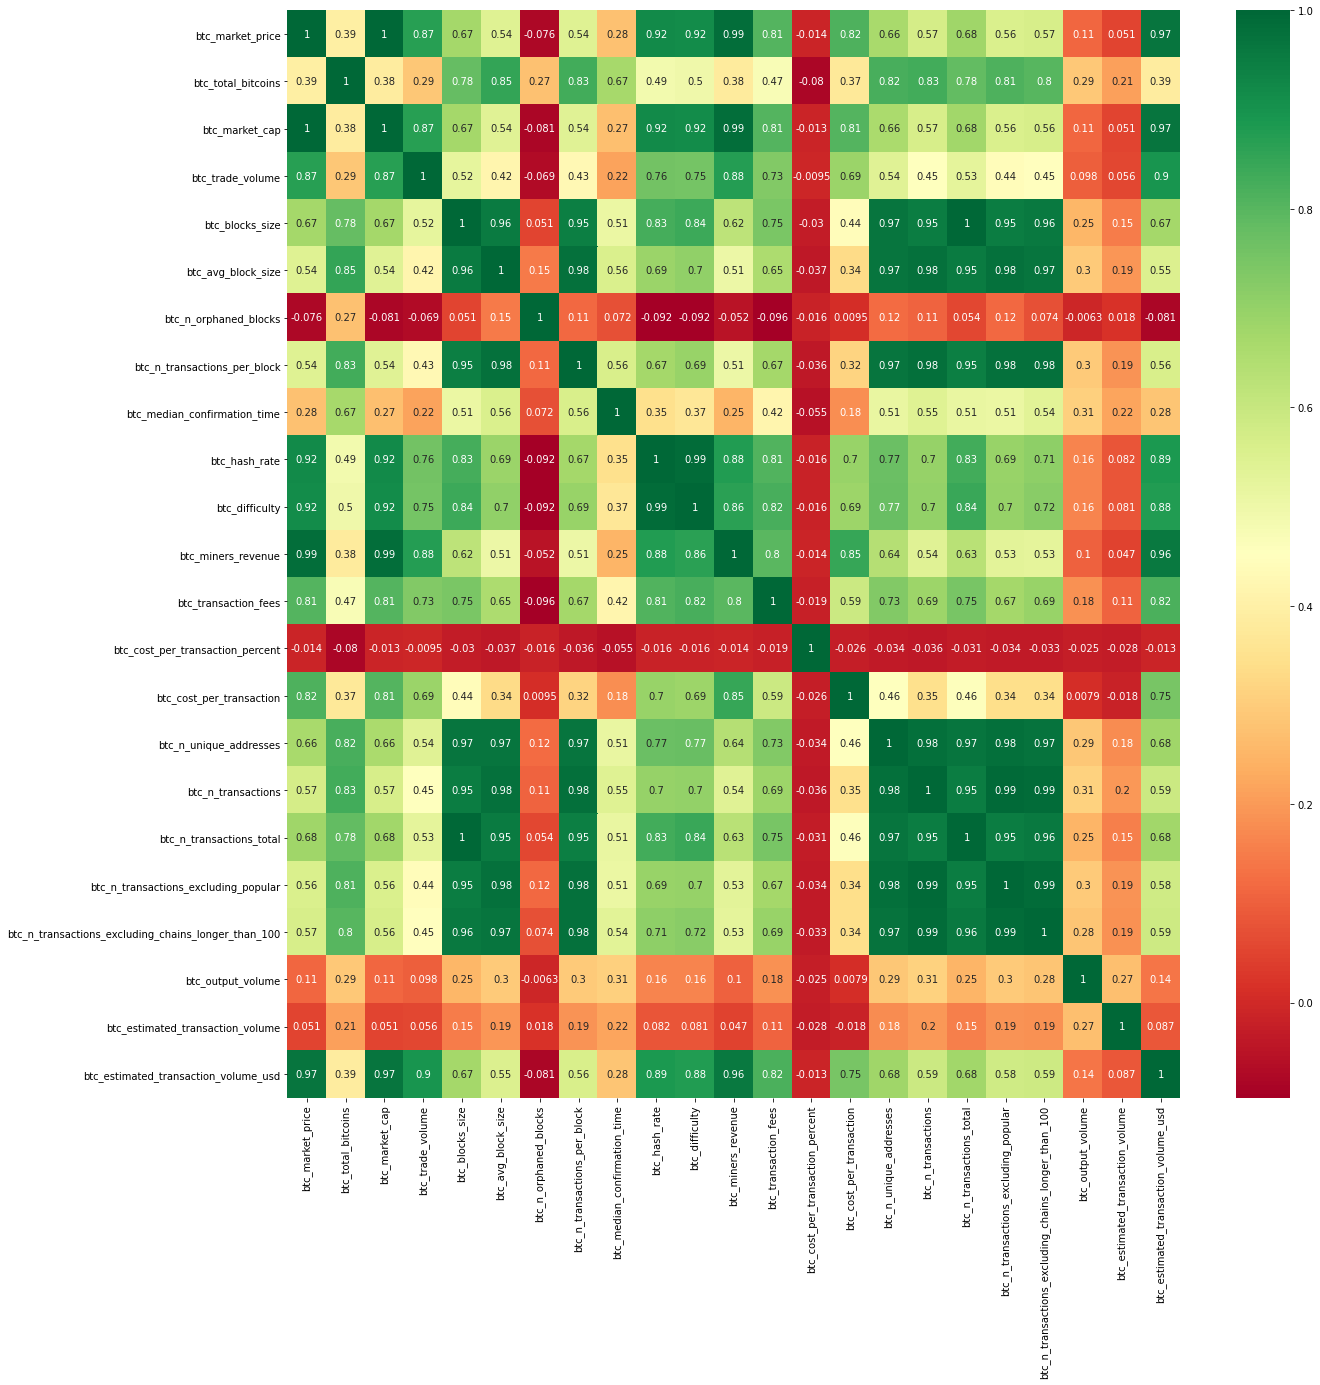

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df[df.columns[1:]].corr()['btc_market_price'][:].sort_values(ascending=False)

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_trade_volume                                       0.868813
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806595
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674507
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block            

#### 'btc_market_cap' shows the highest correlation with 'btc_market_price'

### Exploratory Data Analysis

In [ ]:
#### Jointplot

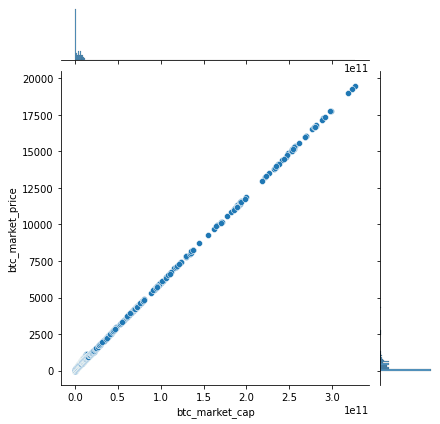

In [ ]:
 sns.jointplot(data=df,x='btc_market_cap', y='btc_market_price',kind='scatter')

#### Microtask -4: Data Cleaning

In [ ]:
df1=df[['btc_market_cap', 'btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent','btc_market_price']]

In [ ]:
df1.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent,btc_market_price
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022,0.0
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801,0.0
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635,0.0
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990,0.0
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


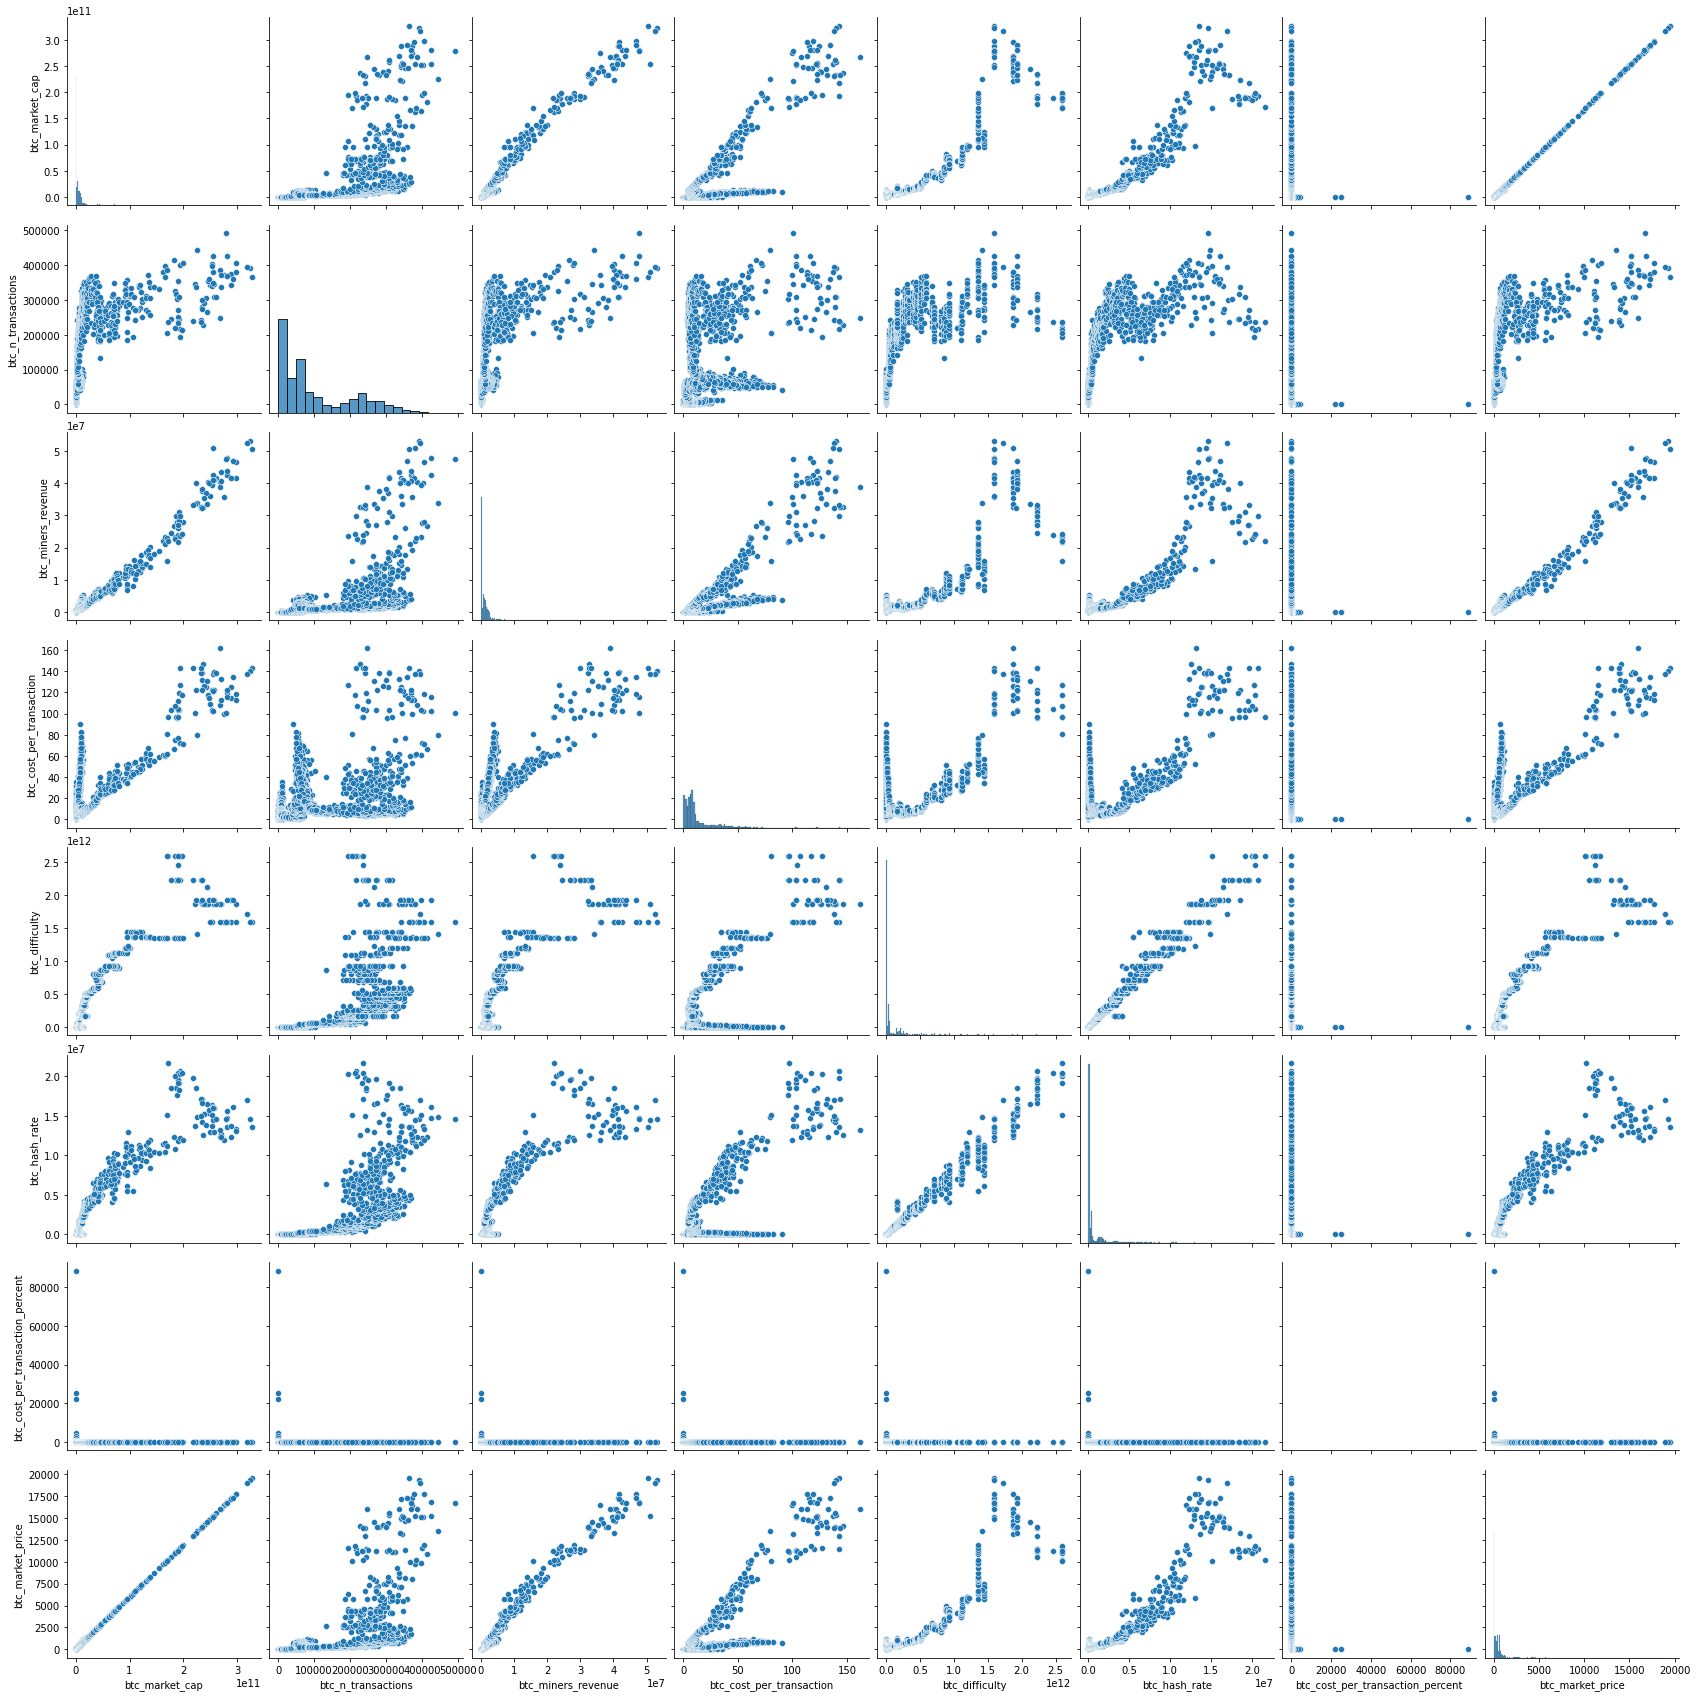

In [39]:
sns.pairplot(df1,palette="bright",diag_kind="auto",size=3)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


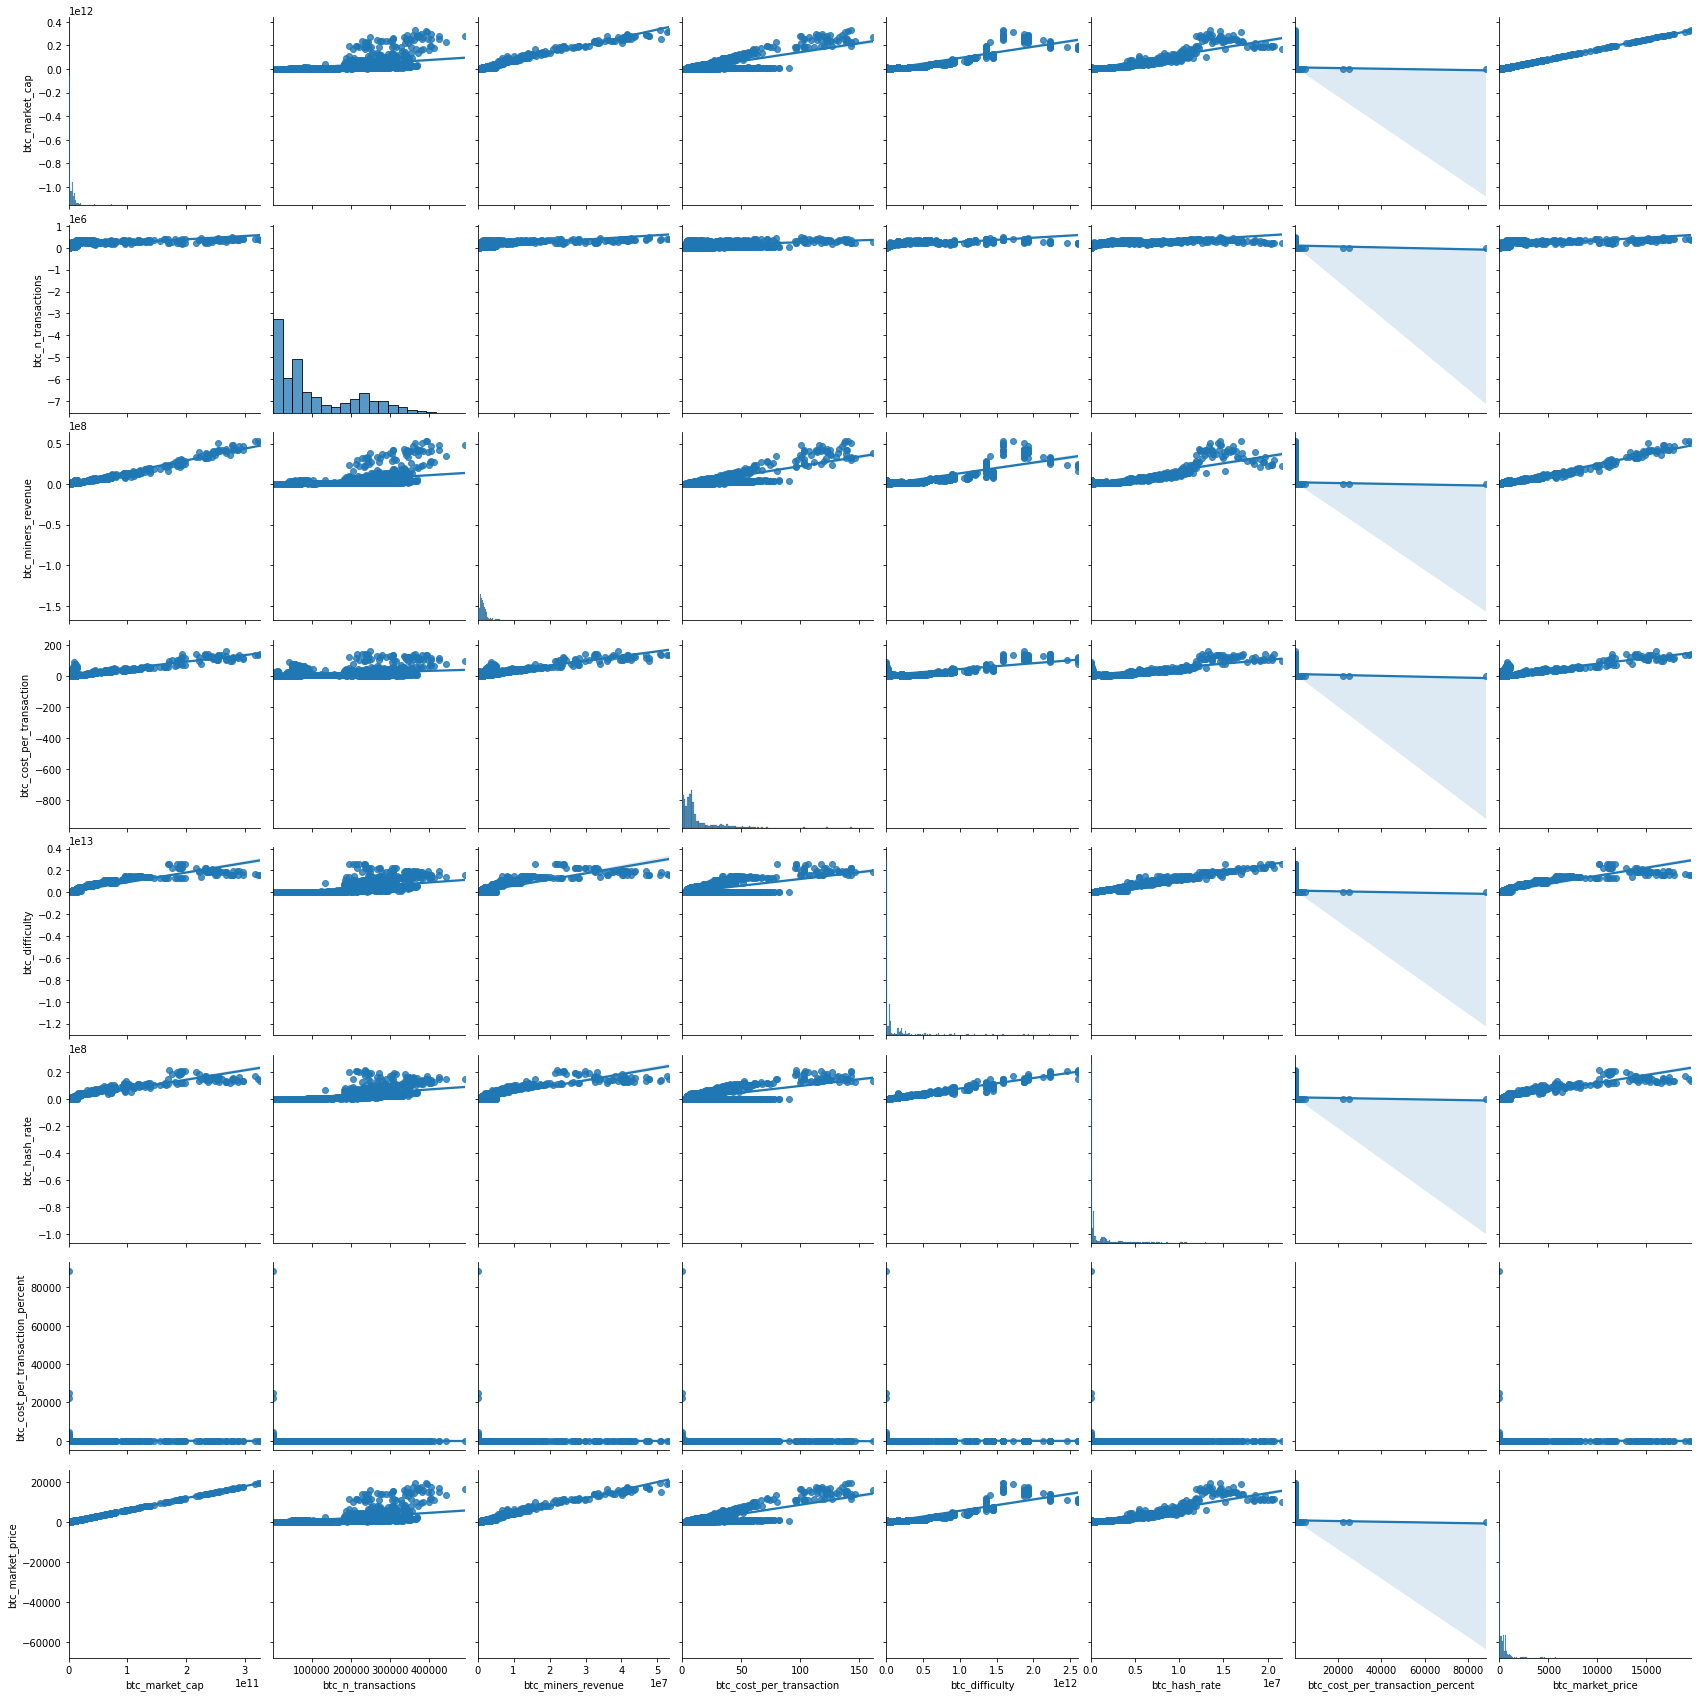

In [41]:
# pairplot with regression line
sns.pairplot(df1,palette="bright",kind="reg",diag_kind="auto",size=3)

In [ ]:
df1.info()

#### Identifying Null values

In [42]:
df1.isna().any() 

btc_market_cap                      False
btc_n_transactions                  False
btc_miners_revenue                  False
btc_cost_per_transaction            False
btc_difficulty                      False
btc_hash_rate                       False
btc_cost_per_transaction_percent    False
btc_market_price                    False
dtype: bool

#### Columwise count of null vlaues

In [43]:
df1.isna().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
btc_market_price                    0
dtype: int64

>Their is 16 null values in 'btc_difficulty'

#### Replacing null values with mean

In [44]:
df1.btc_difficulty.describe()

count    2.906000e+03
mean     1.606360e+11
std      3.714886e+11
min      2.527738e+00
25%      1.591075e+06
50%      2.621404e+09
75%      1.200000e+11
max      2.600000e+12
Name: btc_difficulty, dtype: float64

In [45]:
mean=df1.btc_difficulty.mean()
mean

160635963100.33817

In [46]:
df1.btc_difficulty.fillna(mean, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [47]:
df1.isna().any() 

btc_market_cap                      False
btc_n_transactions                  False
btc_miners_revenue                  False
btc_cost_per_transaction            False
btc_difficulty                      False
btc_hash_rate                       False
btc_cost_per_transaction_percent    False
btc_market_price                    False
dtype: bool

In [48]:
df1.isna().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
btc_market_price                    0
dtype: int64

#### Microtask - 5: Model Formulation & Prediction

In [49]:
X=df1.iloc[:,:-1].values
Y=df1.iloc[:,1].values

#### Train Test Split

In [50]:
#To split this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#### Model Building

In [51]:
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,Y_train)
print("Training completed")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training completed


#### Traning & Testing Score

In [52]:
print('Training Score: ', round(l_reg.score(X_train,Y_train)*100,2),'%')
print('Testing Score: ', round(l_reg.score(X_test,Y_test)*100,2))

Training Score:  100.0 %
Testing Score:  100.0


### Prediction

In [53]:
y_predict=l_reg.predict(X_test)

In [54]:
y_predict

array([6.80800004e+03, 1.16923000e+05, 3.99980000e+04, 2.19600000e+05,
       5.31900004e+03, 7.82100004e+03, 5.11100004e+03, 1.96539000e+05,
       2.91757000e+05, 3.20550000e+04, 5.74070000e+04, 9.34000041e+02,
       3.47220000e+05, 8.14500004e+03, 6.23000041e+02, 3.08380000e+04,
       6.59280000e+04, 9.20520000e+04, 5.58580000e+04, 6.81800004e+03,
       1.54000041e+02, 4.17770000e+04, 1.02985000e+05, 5.55000041e+02,
       1.87900004e+03, 2.46000041e+02, 7.00000004e+03, 5.16000040e+02,
       2.35664000e+05, 3.77000041e+02, 3.43590000e+04, 5.50900004e+03,
       8.39700004e+03, 5.53000004e+03, 1.53538000e+05, 2.77033000e+05,
       6.31510000e+04, 1.42904000e+05, 1.17528000e+05, 4.70900000e+04,
       5.99860000e+04, 5.35510000e+04, 4.90700000e+04, 5.90670000e+04,
       5.74800000e+04, 2.16812000e+05, 1.71159000e+05, 1.20617000e+05,
       5.23000040e+02, 1.78742000e+05, 2.88000041e+02, 2.38385000e+05,
       3.42706999e+05, 6.24230000e+04, 1.22830000e+04, 2.47987000e+05,
      

In [55]:
from sklearn import metrics
acc=metrics.r2_score(Y_test,y_predict)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  100.0 %


#### Actual v/s Predicted Price

In [56]:
prediction_df = pd.DataFrame({ 'Actual Price': Y_test, 'Predicted Price': y_predict})  
prediction_df

,Actual Price,Predicted Price
0,6808,6808.000040
1,116923,116923.000032
2,39998,39998.000040
3,219600,219600.000026
4,5319,5319.000041
...,...,...
577,30652,30652.000041
578,35815,35815.000039
579,6325,6325.000040
580,36738,36738.000040


#### Model Evaluation

In [57]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,y_predict)))
print('Explained Variance Score:',metrics.explained_variance_score(Y_test,y_predict))

Mean Absolute Error: 5.964499115629504e-05
Mean Squared Error: 1.3323989341442039e-08
Root Mean Squared Error: 0.00011542958607498356
Explained Variance Score: 1.0


In [58]:
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(Y_test,y_predict),2))
print('Mean Squared Error:',round(metrics.mean_squared_error(Y_test,y_predict),2))
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(Y_test,y_predict)),2))
print('Explained Variance Score:',metrics.explained_variance_score(Y_test,y_predict))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Explained Variance Score: 1.0


#### Graphial Representation of Predicted vs actual Bitcoin Price

Text(0.5, 0, 'Actual Price')

Text(0, 0.5, 'Predicted Price')

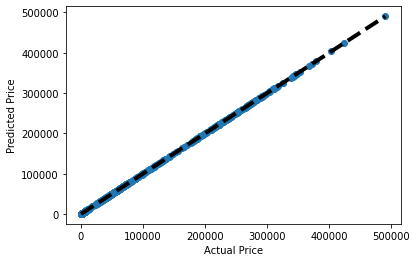

In [59]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_predict)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()

### Thank you ;)